<a href="https://colab.research.google.com/github/Abishek-Subramaniam/Zee-Recommender-System/blob/main/Zee_recommendar_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Downloading the datasets


In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1fwzn5d6QhJev-U60fdl9CnWuonrmfJhZ/view?usp=sharing"
!gdown --fuzzy "https://drive.google.com/file/d/1rrFg9sm1zqJQWwL-GOK_cytq-ts-_8rg/view?usp=sharing"
!gdown --fuzzy "https://drive.google.com/file/d/1FDsMIrcWbU7P1WutVJcoy8H4I3p2etjB/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1fwzn5d6QhJev-U60fdl9CnWuonrmfJhZ
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 44.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rrFg9sm1zqJQWwL-GOK_cytq-ts-_8rg
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FDsMIrcWbU7P1WutVJcoy8H4I3p2etjB
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 25.3MB/s]


####Users Dataset

In [ ]:
user=pd.read_csv('zee-users.dat',delimiter='::')
user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
user.shape

(6040, 5)

In [ ]:
user.isnull().sum()

,0
UserID,0
Gender,0
Age,0
Occupation,0
Zip-code,0


In [ ]:
user.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


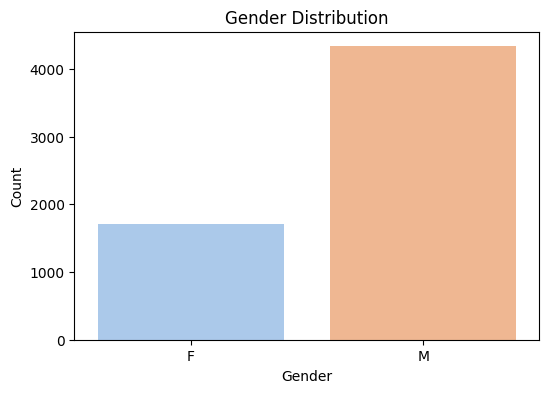

Gender
M    4331
F    1709
Name: count, dtype: int64


In [ ]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=user, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print(user['Gender'].value_counts())

#### Age Distribution
1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"


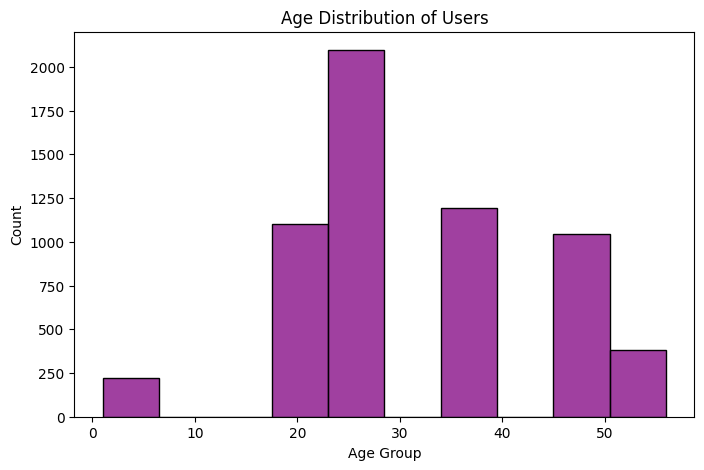

Age
25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: count, dtype: int64


In [ ]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(user['Age'], bins=10, kde=False, color='purple')
plt.title('Age Distribution of Users')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

print(user['Age'].value_counts())

####Occupation is chosen from the following choices:

0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"

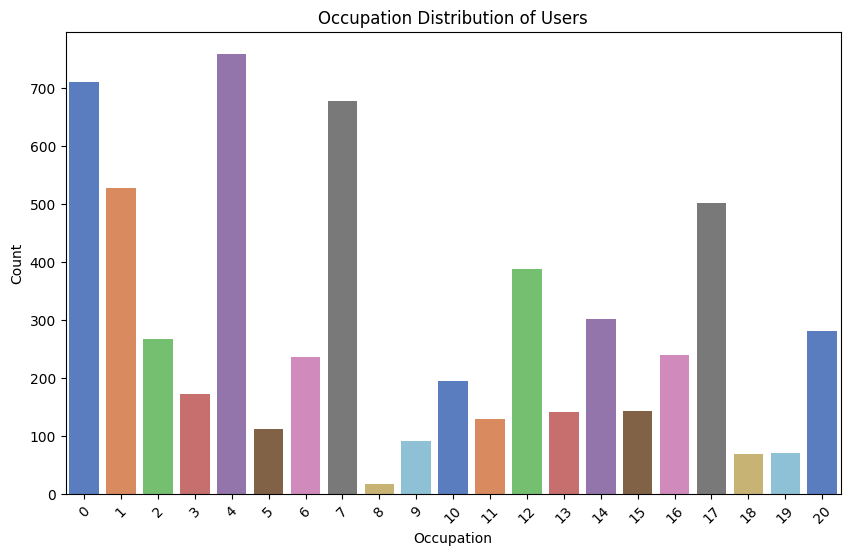

Occupation
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: count, dtype: int64


In [ ]:
# Occupation distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=user, x='Occupation', palette='muted')
plt.title('Occupation Distribution of Users')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(user['Occupation'].value_counts())

### Ratings dataset

In [ ]:
ratings=pd.read_csv('zee-ratings.dat',delimiter='::')
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.shape

(1000209, 4)

In [ ]:
ratings.isnull().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0


In [ ]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


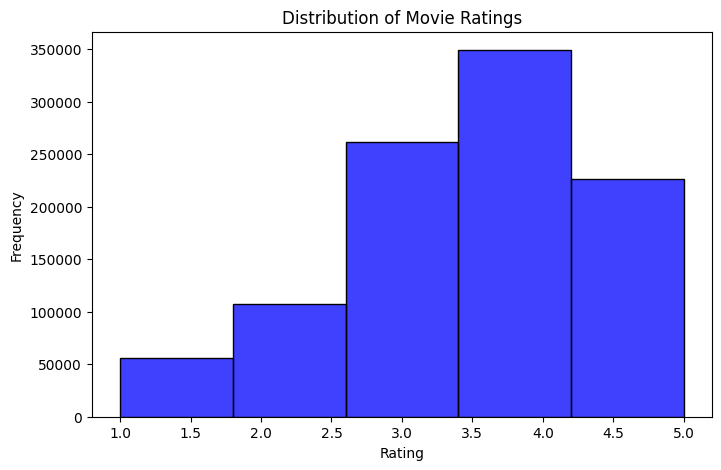

Rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64


In [ ]:
# Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(ratings['Rating'], bins=5, kde=False, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

print(ratings['Rating'].value_counts())

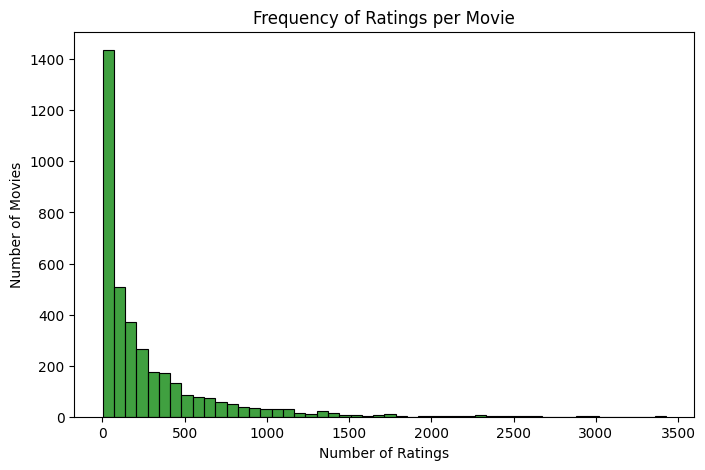

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: Rating, dtype: float64


In [ ]:
# Number of ratings per movie
ratings_per_movie = ratings.groupby('MovieID')['Rating'].count()

plt.figure(figsize=(8, 5))
sns.histplot(ratings_per_movie, bins=50, kde=False, color='green')
plt.title('Frequency of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')

plt.show()

print(ratings_per_movie.describe())

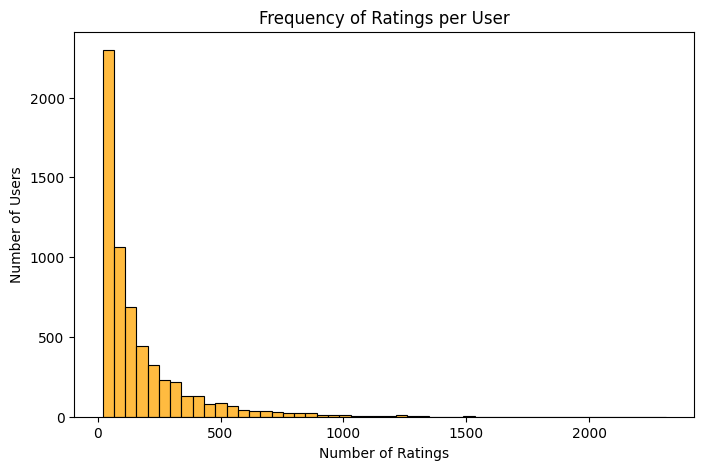

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: Rating, dtype: float64


In [ ]:
# Number of ratings per user
ratings_per_user = ratings.groupby('UserID')['Rating'].count()

plt.figure(figsize=(8, 5))
sns.histplot(ratings_per_user, bins=50, kde=False, color='orange')
plt.title('Frequency of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')

plt.show()

print(ratings_per_user.describe())

In [ ]:
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s')

In [ ]:
ratings['Year'] = ratings['Timestamp'].dt.year
ratings_per_year = ratings.groupby('Year')['Rating'].count()

print(ratings_per_year)

Year
2000    904757
2001     68058
2002     24046
2003      3348
Name: Rating, dtype: int64


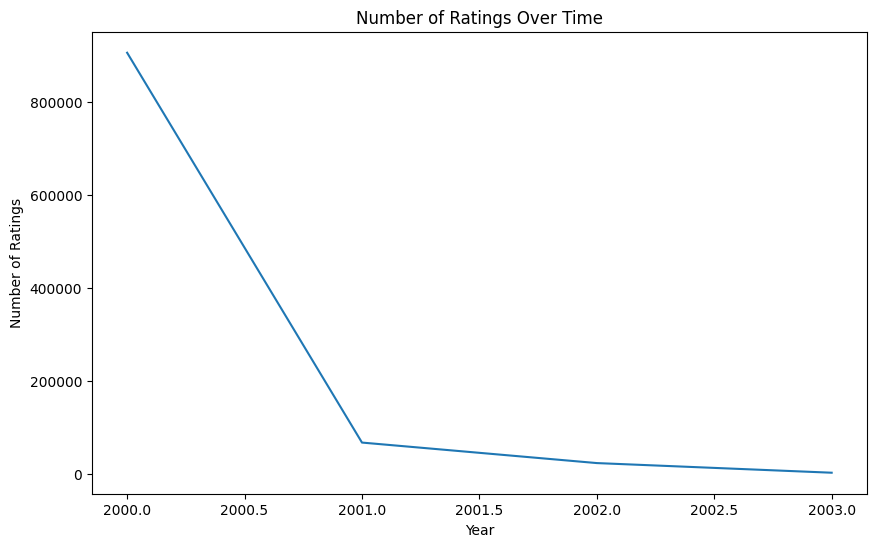

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=ratings_per_year.index, y=ratings_per_year.values)
plt.title('Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()

### movies dataset

In [ ]:
movies=pd.read_csv('zee-movies.dat',delimiter='::',encoding='latin-1')
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(3883, 3)

In [ ]:
movies.isnull().sum()

,0
Movie ID,0
Title,0
Genres,0


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
movies['Genres'].value_counts()

,count
Genres,
Drama,843
Comedy,521
Horror,178
Comedy|Drama,162
Comedy|Romance,142
...,...
Action|Comedy|Crime|Horror|Thriller,1
Action|Drama|Thriller|War,1
Action|Adventure|Children's,1


In [ ]:
## explode the genres

movies['Genres'] = movies['Genres'].apply(lambda x: x.split('|'))
movies = movies.explode('Genres')

In [ ]:
genre_counts=movies['Genres'].value_counts()
genre_counts

,count
Genres,
Drama,1603
Comedy,1200
Action,503
Thriller,492
Romance,471
Horror,343
Adventure,283
Sci-Fi,276
Children's,251


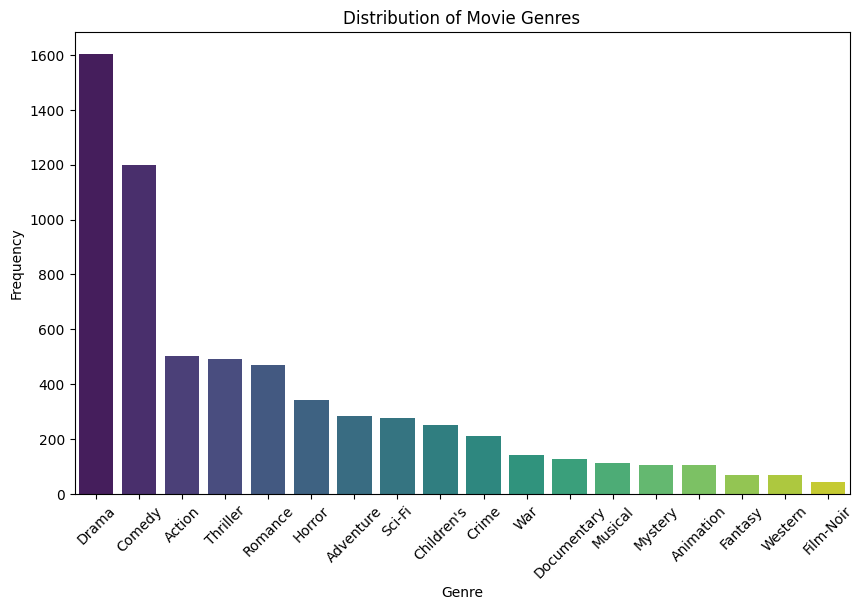

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
movies.head(10)

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


####Relationship Between Age Groups and Genre Preferences

In [ ]:
movies.rename(columns={'Movie ID': 'MovieID'}, inplace=True)


In [ ]:
merged_data = ratings.merge(user, on='UserID').merge(movies, on='MovieID')
merged_data.head(10)

,UserID,MovieID,Rating,Timestamp,Year,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,2000-12-31 22:12:40,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Animation
2,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Children's
3,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Musical
4,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),Musical
5,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),Romance
6,1,3408,4,2000-12-31 22:04:35,2000,F,1,10,48067,Erin Brockovich (2000),Drama
7,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",Animation
8,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",Children's
9,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",Comedy


In [ ]:
## mapping for age groups
age_groups = {
    1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44",
    45: "45-49", 50: "50-55", 56: "56+"
}


In [ ]:
merged_data['AgeGroup'] = merged_data['Age'].map(age_groups)
merged_data.head(10)

,UserID,MovieID,Rating,Timestamp,Year,Gender,Age,Occupation,Zip-code,Title,Genres,AgeGroup
0,1,1193,5,2000-12-31 22:12:40,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Animation,Under 18
2,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Children's,Under 18
3,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Musical,Under 18
4,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),Musical,Under 18
5,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),Romance,Under 18
6,1,3408,4,2000-12-31 22:04:35,2000,F,1,10,48067,Erin Brockovich (2000),Drama,Under 18
7,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",Animation,Under 18
8,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",Children's,Under 18
9,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",Comedy,Under 18


In [ ]:
### genre preferences by age group

genre_age_group = merged_data.groupby(['Genres', 'AgeGroup']).size().unstack()
genre_age_group

AgeGroup,18-24,25-34,35-44,45-49,50-55,56+,Under 18
Genres,,,,,,,
Action,50186,105678,50503,19357,17012,8143,6578
Adventure,26324,52633,26682,10738,9090,4488,3998
Animation,10269,16454,8117,2889,2032,1083,2449
Children's,16924,25743,14004,5400,3890,1888,4337
Comedy,69980,143210,69244,27890,23133,11961,11162
Crime,15373,33030,14895,6048,5520,2974,1701
Documentary,1081,3489,1708,687,555,260,130
Drama,58104,138695,71590,32141,29247,17269,7483
Fantasy,7875,14290,7006,2695,2127,948,1360


In [ ]:
# Normalize to find relative preferences
genre_age_group_normalized = genre_age_group.div(genre_age_group.sum(axis=0), axis=1)
genre_age_group_normalized

AgeGroup,18-24,25-34,35-44,45-49,50-55,56+,Under 18
Genres,,,,,,,
Action,0.128078,0.127119,0.120955,0.111454,0.113572,0.103309,0.111833
Adventure,0.067181,0.063312,0.063904,0.061827,0.060685,0.056938,0.067970
Animation,0.026207,0.019792,0.019440,0.016634,0.013566,0.013740,0.041635
Children's,0.043191,0.030966,0.033540,0.031092,0.025970,0.023953,0.073733
Comedy,0.178594,0.172266,0.165840,0.160585,0.154435,0.151747,0.189765
Crime,0.039233,0.039731,0.035674,0.034823,0.036851,0.037731,0.028919
Documentary,0.002759,0.004197,0.004091,0.003956,0.003705,0.003299,0.002210
Drama,0.148285,0.166835,0.171459,0.185062,0.195252,0.219089,0.127219
Fantasy,0.020098,0.017189,0.016779,0.015517,0.014200,0.012027,0.023121


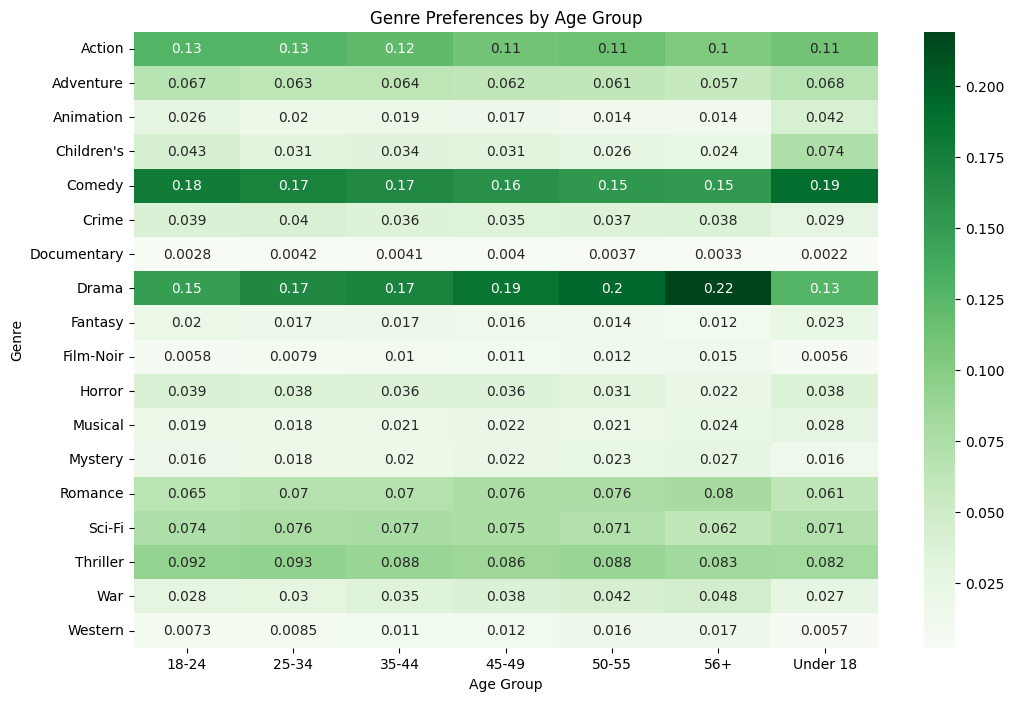

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(genre_age_group_normalized, cmap='Greens', annot=True, cbar=True)
plt.title('Genre Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Genre')
plt.show()

#### Relationship Between Ratings and Demographics

In [ ]:
gender_rating = merged_data.groupby('Gender')['Rating'].mean()
gender_rating

,Rating
Gender,
F,3.621453
M,3.570274


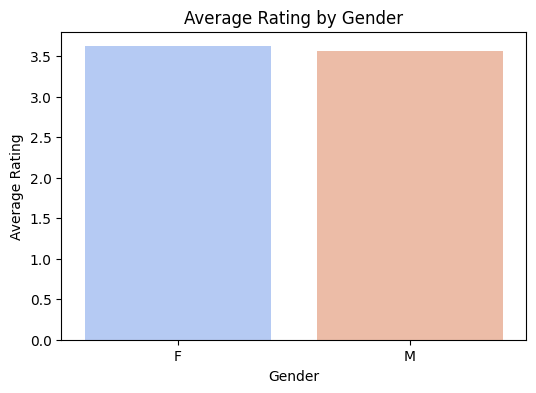

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_rating.index, y=gender_rating.values, palette='coolwarm')
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
age_group_rating = merged_data.groupby('AgeGroup')['Rating'].mean().sort_index()
age_group_rating

,Rating
AgeGroup,
18-24,3.509602
25-34,3.547204
35-44,3.622448
45-49,3.641898
50-55,3.715984
56+,3.758113
Under 18,3.536093


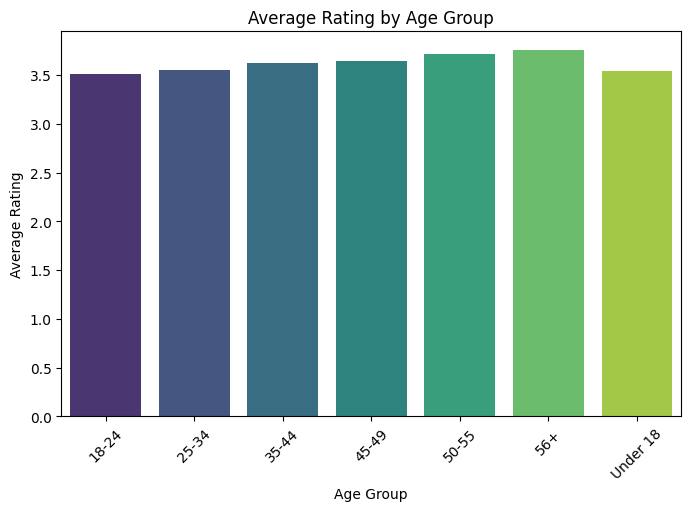

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_rating.index, y=age_group_rating.values, palette='viridis')
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

####Ratings for Certain Movies

In [ ]:
# Average rating per movie
movie_ratings = merged_data.groupby('MovieID')['Rating'].mean()
movie_ratings_count = merged_data.groupby('MovieID')['Rating'].count()
print(movie_ratings)
print(movie_ratings_count)

MovieID
1       4.146846
2       3.201141
3       3.016736
4       2.729412
5       3.006757
          ...   
3948    3.635731
3949    4.115132
3950    3.666667
3951    3.900000
3952    3.780928
Name: Rating, Length: 3706, dtype: float64
MovieID
1       6231
2       2103
3        956
4        340
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     776
Name: Rating, Length: 3706, dtype: int64


In [ ]:
movie_stats = pd.DataFrame({'AverageRating': movie_ratings, 'RatingCount': movie_ratings_count})
movie_stats

,AverageRating,RatingCount
MovieID,,
1,4.146846,6231
2,3.201141,2103
3,3.016736,956
4,2.729412,340
5,3.006757,296
...,...,...
3948,3.635731,862
3949,4.115132,304
3950,3.666667,54


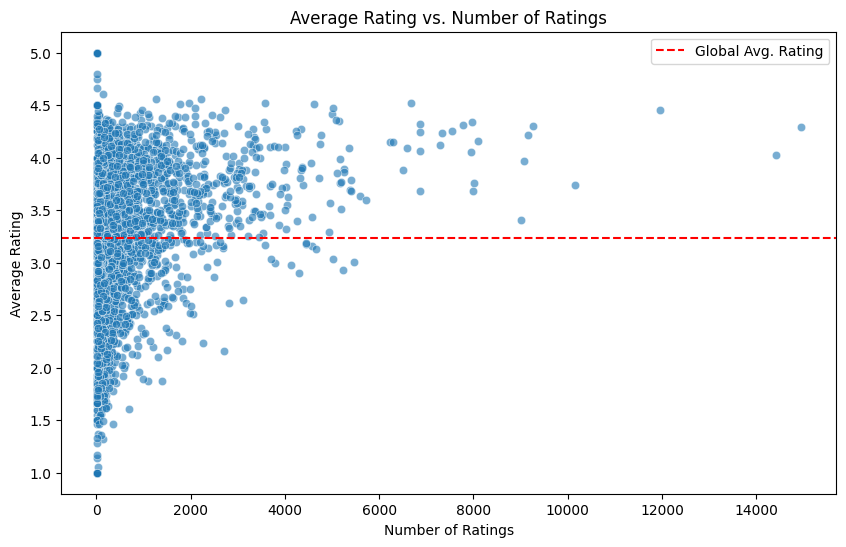

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_stats, x='RatingCount', y='AverageRating', alpha=0.6)
plt.title('Average Rating vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.axhline(y=movie_stats['AverageRating'].mean(), color='red', linestyle='--', label='Global Avg. Rating')
plt.legend()
plt.show()

###Distribution of Ratings Over Genres

In [ ]:
average_genre_ratings = merged_data.groupby('Genres')['Rating'].mean().sort_values()
average_genre_ratings

,Rating
Genres,
Horror,3.215013
Children's,3.422035
Fantasy,3.447371
Sci-Fi,3.466521
Adventure,3.477257
Action,3.491185
Comedy,3.522099
Thriller,3.570466
Romance,3.607465


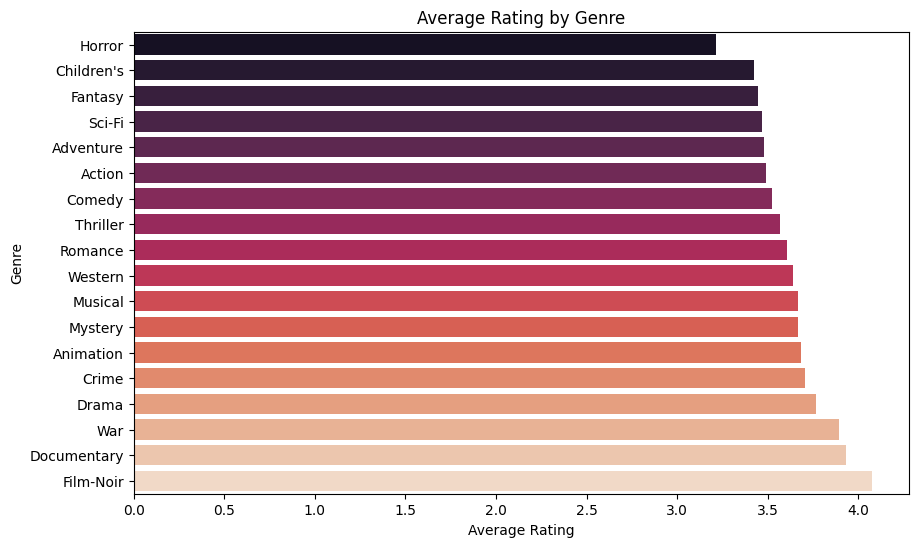

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_genre_ratings.values, y=average_genre_ratings.index, palette='rocket')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Ratings over time (by year)
ratings_by_year = merged_data.groupby(merged_data['Timestamp'].dt.year)['Rating'].mean()
ratings_by_year

,Rating
Timestamp,
2000,3.591425
2001,3.506452
2002,3.449801
2003,3.481905


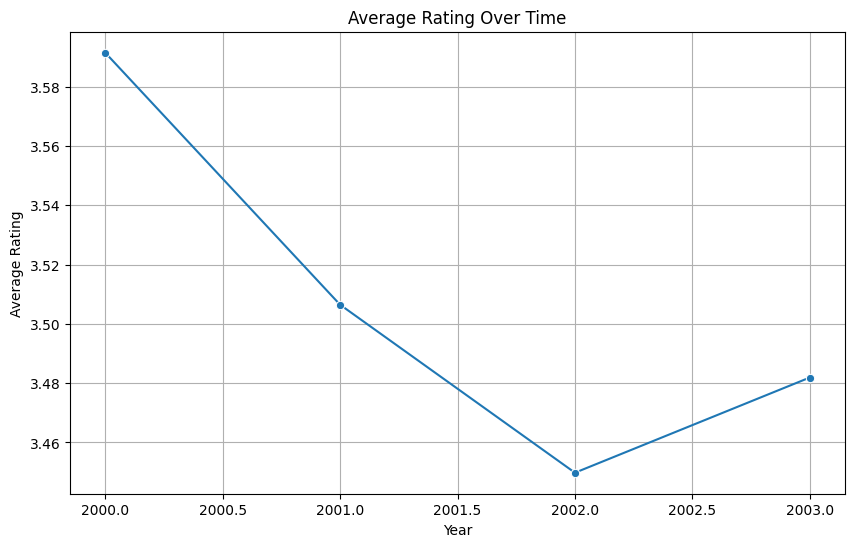

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values, marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

In [ ]:
merged_data

,UserID,MovieID,Rating,Timestamp,Year,Gender,Age,Occupation,Zip-code,Title,Genres,AgeGroup
0,1,1193,5,2000-12-31 22:12:40,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Animation,Under 18
2,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Children's,Under 18
3,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),Musical,Under 18
4,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),Musical,Under 18
...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,6040,1096,4,2000-04-26 02:20:48,2000,M,25,6,11106,Sophie's Choice (1982),Drama,25-34
2101811,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,E.T. the Extra-Terrestrial (1982),Children's,25-34
2101812,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,E.T. the Extra-Terrestrial (1982),Drama,25-34
2101813,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,E.T. the Extra-Terrestrial (1982),Fantasy,25-34


In [ ]:
merged_data.isnull().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0
Year,0
Gender,0
Age,0
Occupation,0
Zip-code,0
Title,0


####Data Transformation for Recommender System

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

In [ ]:
# Multi-hot encoding for Genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(merged_data['Genres'].str.split('|'))
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

In [ ]:
genres_df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2101811,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2101812,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2101813,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Merge genres_encoded back to the original dataframe
merged_data = merged_data.reset_index(drop=True)
merged_data = pd.concat([merged_data, genres_df], axis=1)

In [ ]:
merged_data

,UserID,MovieID,Rating,Timestamp,Year,Gender,Age,Occupation,Zip-code,Title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,2000-12-31 22:12:40,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,0,0,0,0,0,0,0,0,0,0
2,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,0,0,0,0,0,0,0,0,0,0
3,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,0,0,0,1,0,0,0,0,0,0
4,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,6040,1096,4,2000-04-26 02:20:48,2000,M,25,6,11106,Sophie's Choice (1982),...,0,0,0,0,0,0,0,0,0,0
2101811,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,E.T. the Extra-Terrestrial (1982),...,0,0,0,0,0,0,0,0,0,0
2101812,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,E.T. the Extra-Terrestrial (1982),...,0,0,0,0,0,0,0,0,0,0
2101813,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,E.T. the Extra-Terrestrial (1982),...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# One-hot encoding for Occupation
occupation_ohe = pd.get_dummies(merged_data['Occupation'], prefix='Occupation')

In [ ]:
occupation_ohe

,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2101811,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2101812,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2101813,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Merge one-hot encoded Occupation back to the original dataframe
merged_data = pd.concat([merged_data, occupation_ohe], axis=1)

In [ ]:
merged_data.head(15)

,UserID,MovieID,Rating,Timestamp,Year,Gender,Age,Occupation,Zip-code,Title,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,1193,5,2000-12-31 22:12:40,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),...,False,False,False,False,False,False,False,False,False,False
1,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
2,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
3,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
4,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),...,False,False,False,False,False,False,False,False,False,False
5,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),...,False,False,False,False,False,False,False,False,False,False
6,1,3408,4,2000-12-31 22:04:35,2000,F,1,10,48067,Erin Brockovich (2000),...,False,False,False,False,False,False,False,False,False,False
7,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",...,False,False,False,False,False,False,False,False,False,False
8,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",...,False,False,False,False,False,False,False,False,False,False
9,1,2355,5,2001-01-06 23:38:11,2001,F,1,10,48067,"Bug's Life, A (1998)",...,False,False,False,False,False,False,False,False,False,False


####Creating the User-Movie Ratings Matrix

In [ ]:
ratings_matrix = merged_data.pivot_table(
    index='UserID', columns='MovieID', values='Rating', fill_value=0
)

In [ ]:
ratings_matrix.head(15)

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


####Handling Sparse Data in the User-Item Interaction Matrix

In [ ]:
# Calculate the sparsity level
total_entries = ratings_matrix.shape[0] * ratings_matrix.shape[1]
non_zero_entries = ratings_matrix[ratings_matrix > 0].count().sum()
sparsity = 1 - (non_zero_entries / total_entries)

print(f"Sparsity Level: {sparsity:.2%}")


Sparsity Level: 95.53%


In [ ]:
# Fill missing values with the average rating per user
user_mean = ratings_matrix.mean(axis=1)
ratings_matrix_imputed_user = ratings_matrix.apply(lambda x: x.fillna(user_mean[x.name]), axis=1)

In [ ]:
ratings_matrix_imputed_user.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Fill missing values with the average rating per movie
movie_mean = ratings_matrix.mean(axis=0)
ratings_matrix_imputed_movie = ratings_matrix.apply(lambda x: x.fillna(movie_mean), axis=0)

In [ ]:
ratings_matrix_imputed_movie.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Matrix Factorization

In [ ]:
from sklearn.decomposition import TruncatedSVD


# Replace NaN with 0 for SVD
ratings_matrix_svd = ratings_matrix.fillna(0)

# Perform SVD
svd = TruncatedSVD(n_components=50, random_state=42)  # 50 latent features
user_factors = svd.fit_transform(ratings_matrix_svd)
item_factors = svd.components_

# Approximate the matrix by reconstructing it
ratings_matrix_approx = np.dot(user_factors, item_factors)

# Convert back to DataFrame
ratings_matrix_reconstructed = pd.DataFrame(
    ratings_matrix_approx, index=ratings_matrix.index, columns=ratings_matrix.columns
)

ratings_matrix_reconstructed.head()


MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.334356,0.196434,-0.113227,-0.004167,0.033737,-0.119442,-0.066878,0.151930,-0.036990,-0.239757,...,-0.014300,0.003594,0.031507,-0.023613,-0.082856,0.347910,0.043899,0.033351,0.036225,0.026597
2,0.408340,0.317336,0.296962,-0.030344,0.024064,1.129896,0.031151,0.101914,0.151955,1.567288,...,-0.020611,-0.016195,-0.013914,0.069129,-0.006075,0.158976,-0.390087,-0.118616,-0.057656,-0.103925
3,1.690478,0.491015,0.049931,-0.030873,-0.039262,-0.250774,-0.151708,0.131290,0.033313,0.666713,...,0.070929,-0.002093,0.022535,0.041023,0.055710,0.006837,0.087869,0.041058,0.032945,-0.131615
4,0.427541,0.019985,0.044520,0.076429,0.060511,0.261063,-0.082883,0.027222,0.046062,-0.114047,...,0.002738,0.007235,-0.001954,0.003014,-0.080804,0.067892,0.038117,-0.024020,0.008817,-0.028268
5,1.295450,-0.069471,-0.017824,0.221492,-0.113363,1.448588,-0.142315,-0.026723,-0.052286,0.413027,...,0.095068,0.012691,-0.020192,-0.035746,-0.043577,-0.106395,0.451808,0.003117,0.100250,0.206373


In [ ]:
# Calculate the sparsity level
total_entries = ratings_matrix_reconstructed.shape[0] * ratings_matrix_reconstructed.shape[1]
non_zero_entries = ratings_matrix_reconstructed[ratings_matrix_reconstructed > 0].count().sum()
sparsity = 1 - (non_zero_entries / total_entries)

print(f"Sparsity Level: {sparsity:.2%}")


Sparsity Level: 38.83%


In [ ]:
merged_data.head()

,UserID,MovieID,Rating,Timestamp,Year,Gender,Age,Occupation,Zip-code,Title,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,1193,5,2000-12-31 22:12:40,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),...,False,False,False,False,False,False,False,False,False,False
1,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
2,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
3,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
4,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),...,False,False,False,False,False,False,False,False,False,False


###Model Building: Item-Based Collaborative Filtering Using Pearson Correlation

In [ ]:
##Ratings Threshold

# Count the number of ratings per movie
movie_ratings_count = merged_data.groupby('Title')['Rating'].count()
print(movie_ratings_count[movie_ratings_count < 2])  # Check movies with low ratings

# Filter out movies with very few ratings
sufficient_ratings = movie_ratings_count[movie_ratings_count >= 2].index
filtered_data = merged_data[merged_data['Title'].isin(sufficient_ratings)]


Title
Aiqing wansui (1994)                       1
Alley Cats, The (1968)                     1
An Unforgettable Summer (1994)             1
Anna (1996)                                1
Baby, The (1973)                           1
                                          ..
Wend Kuuni (God's Gift) (1982)             1
White Boys (1999)                          1
Windows (1980)                             1
With Byrd at the South Pole (1930)         1
Wooden Man's Bride, The (Wu Kui) (1994)    1
Name: Rating, Length: 87, dtype: int64


In [ ]:
# Check for missing movie titles or ratings
print(merged_data[['Title', 'Rating']].isnull().sum())

Title     0
Rating    0
dtype: int64


In [ ]:
# Remove extra spaces and standardize titles
merged_data['Title'] = merged_data['Title'].str.strip().str.lower()

In [ ]:
merged_data

,UserID,MovieID,Rating,Timestamp,Year,Gender,Age,Occupation,Zip-code,Title,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,1193,5,2000-12-31 22:12:40,2000,F,1,10,48067,one flew over the cuckoo's nest (1975),...,False,False,False,False,False,False,False,False,False,False
1,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,james and the giant peach (1996),...,False,False,False,False,False,False,False,False,False,False
2,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,james and the giant peach (1996),...,False,False,False,False,False,False,False,False,False,False
3,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,james and the giant peach (1996),...,False,False,False,False,False,False,False,False,False,False
4,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,my fair lady (1964),...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,6040,1096,4,2000-04-26 02:20:48,2000,M,25,6,11106,sophie's choice (1982),...,False,False,False,False,False,False,False,False,False,False
2101811,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,e.t. the extra-terrestrial (1982),...,False,False,False,False,False,False,False,False,False,False
2101812,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,e.t. the extra-terrestrial (1982),...,False,False,False,False,False,False,False,False,False,False
2101813,6040,1097,4,2000-04-26 02:19:29,2000,M,25,6,11106,e.t. the extra-terrestrial (1982),...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Create user-movie pivot table
user_movie_pivot = filtered_data.pivot_table(index='UserID', columns='Title', values='Rating')

In [ ]:
user_movie_pivot

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,3.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fill NaN with  mean rating of each movie
movie_user_matrix_filled = user_movie_pivot.fillna(user_movie_pivot.mean(axis=0))

In [ ]:
movie_user_matrix_filled

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
2,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
3,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
4,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
5,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.027027,3.000000,2.692308,2.910891,3.713568,2.5,2.000000,4.00000,3.046703,4.295455,...,3.632911,3.000000,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,2.000000
6037,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.000000,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
6038,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098


In [ ]:
# Compute Pearson Correlation for movies
movie_similarity = movie_user_matrix_filled.corr(method='pearson')

In [ ]:
movie_similarity.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.005426,0.000218,0.000237,0.011534,4.133058e-15,-0.035030,0.106339,0.026127,-0.026918,...,0.008211,-0.013066,8.740249e-16,-0.008771,5.729771e-16,-0.016180,0.002219,-2.309585e-15,1.242279e-02,-0.011893
'Night Mother (1986),0.005426,1.000000,-0.027920,0.016997,0.043916,-1.287556e-15,0.017359,0.033991,-0.010504,0.023962,...,0.045371,-0.013403,-1.637718e-04,-0.009447,-8.191163e-16,-0.085133,0.005007,3.669793e-15,-1.211629e-15,0.002673
'Til There Was You (1997),0.000218,-0.027920,1.000000,0.106643,0.039437,-6.719412e-02,0.037274,0.070025,0.071656,0.028098,...,-0.002787,0.001950,-8.543742e-16,0.002469,-2.473120e-16,-0.003137,0.019337,4.672566e-15,1.324870e-02,0.017444
"'burbs, The (1989)",0.000237,0.016997,0.106643,1.000000,0.006962,-6.384217e-15,0.046215,0.026934,0.027559,0.010346,...,0.048543,0.052684,-4.519952e-03,0.024466,-1.629053e-15,0.001550,0.009262,9.016159e-15,-1.718682e-02,0.020929
...And Justice for All (1979),0.011534,0.043916,0.039437,0.006962,1.000000,-3.120009e-15,0.020514,0.032768,-0.017430,0.064177,...,-0.026911,0.010570,7.538153e-02,0.014089,-5.399955e-17,-0.074584,0.024968,7.361906e-02,3.150148e-16,-0.003858


In [ ]:
# Function to recommend movies based on a given movie
def recommend_movies(movie_title, n_recommendations=5):
    if movie_title not in movie_similarity:
        return f"Movie '{movie_title}' not found in the dataset."

    # Get similarity scores for the given movie
    similar_movies = movie_similarity[movie_title].dropna()

    # Sort by similarity score
    similar_movies = similar_movies.sort_values(ascending=False)[1:]  # Exclude the movie itself

    # Get top N recommendations
    top_movies = similar_movies.head(n_recommendations)
    return top_movies

In [ ]:
# Example: Recommend 5 movies similar to "Toy Story (1995)"
recommended_movies = recommend_movies("Toy Story (1995)", n_recommendations=5)
print("\nRecommended Movies for 'Toy Story (1995)':")
print(recommended_movies)


Recommended Movies for 'Toy Story (1995)':
Title
Toy Story 2 (1999)             0.359299
Aladdin (1992)                 0.263130
Bug's Life, A (1998)           0.241819
Beauty and the Beast (1991)    0.216925
Lion King, The (1994)          0.204845
Name: Toy Story (1995), dtype: float64


#### Collaborative Filtering with Cosine Similarity for item-item recommendations

#####User-Movie Matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-movie pivot table
user_movie_matrix = filtered_data.pivot_table(index='UserID', columns='Title', values='Rating')


In [ ]:
user_movie_matrix.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_matrix = user_movie_matrix.fillna(user_movie_matrix.mean(axis=0))

user_movie_matrix.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
2,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
3,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
4,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
5,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098


In [ ]:
###Cosine Similarity for Movies

movie_similarity = cosine_similarity(user_movie_matrix.T)

In [ ]:
movie_similarity_df = pd.DataFrame(movie_similarity,
                                   index=user_movie_matrix.columns,
                                   columns=user_movie_matrix.columns)

In [ ]:
movie_similarity_df.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.998989,0.999007,0.996013,0.998711,0.999605,0.994714,0.996396,0.995792,0.997750,...,0.999315,0.997434,0.999505,0.998604,0.999582,0.999382,0.997702,0.999609,0.999261,0.995176
'Night Mother (1986),0.998989,1.000000,0.998732,0.995824,0.998524,0.999365,0.994631,0.996011,0.995456,0.997606,...,0.999108,0.997187,0.999265,0.998360,0.999341,0.999088,0.997469,0.999368,0.999011,0.994977
'Til There Was You (1997),0.999007,0.998732,1.000000,0.996110,0.998538,0.999379,0.994720,0.996136,0.995731,0.997637,...,0.999089,0.997245,0.999287,0.998401,0.999364,0.999172,0.997523,0.999391,0.999046,0.995047
"'burbs, The (1989)",0.996013,0.995824,0.996110,1.000000,0.995512,0.996392,0.991996,0.993138,0.992734,0.994641,...,0.996198,0.994545,0.996287,0.995498,0.996369,0.996182,0.994540,0.996396,0.996000,0.992175
...And Justice for All (1979),0.998711,0.998524,0.998538,0.995512,1.000000,0.999078,0.994371,0.995741,0.995137,0.997434,...,0.998754,0.996962,0.999025,0.998115,0.999054,0.998798,0.997238,0.999090,0.998724,0.994667


In [ ]:
print("Toy Story (1995)" in movie_similarity_df.index)

True


In [ ]:
###Recommend Similar Movies

# Function to recommend movies based on a given movie
def recommend_movies(movie_title, n_recommendations=5):
    if movie_title not in movie_similarity_df:
        return f"Movie '{movie_title}' not found in the dataset."

    # Get similarity scores for the given movie
    similar_movies = movie_similarity_df[movie_title].dropna()

    # Sort by similarity score
    similar_movies = similar_movies.sort_values(ascending=False)[1:]  # Exclude the movie itself

    # Get top N recommendations
    top_movies = similar_movies.head(n_recommendations)
    return top_movies



In [ ]:
# Example: Recommend 5 movies similar to "Toy Story (1995)"
recommended_movies = recommend_movies("Toy Story (1995)", n_recommendations=5)
print("\nRecommended Movies for 'Toy Story (1995)':")
print(recommended_movies)


Recommended Movies for 'Toy Story (1995)':
Title
Enfer, L' (1994)                        0.992857
Big Combo, The (1955)                   0.992852
Small Wonders (1996)                    0.992841
Born American (1986)                    0.992832
Search for One-eye Jimmy, The (1996)    0.992831
Name: Toy Story (1995), dtype: float64


In [ ]:
recommended_movies = recommend_movies("Liar Liar (1997)", n_recommendations=5)
print("\nRecommended Movies for 'Liar Liar (1997)':")
print(recommended_movies)


Recommended Movies for 'Liar Liar (1997)':
Title
Last Time I Committed Suicide, The (1997)    0.996327
Leading Man, The (1996)                      0.996316
Pushing Hands (1992)                         0.996315
Small Wonders (1996)                         0.996314
Oxygen (1999)                                0.996311
Name: Liar Liar (1997), dtype: float64


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Initialize Nearest Neighbors with cosine metric
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_movie_matrix.T)

# Query for 'Toy Story (1995)'
movie_idx = list(user_movie_matrix.columns).index('Toy Story (1995)')
distances, indices = model_knn.kneighbors(user_movie_matrix.T.iloc[movie_idx, :].values.reshape(1, -1), n_neighbors=6)

print("Recommended Movies for 'Toy Story (1995)':")
for idx, distance in zip(indices.flatten(), distances.flatten()):
    if idx != movie_idx:  # Skip the queried movie itself
        print(f"{user_movie_matrix.columns[idx]} with similarity {1-distance:.2f}")


Recommended Movies for 'Toy Story (1995)':
Enfer, L' (1994) with similarity 0.99
Big Combo, The (1955) with similarity 0.99
Small Wonders (1996) with similarity 0.99
Born American (1986) with similarity 0.99
Search for One-eye Jimmy, The (1996) with similarity 0.99


###Matrix Factorization

In [ ]:
pip install scikit-surprise

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy


In [ ]:
# Selecting relevant columns
ratings_data = filtered_data[['UserID', 'Title', 'Rating']]
ratings_data.head()

,UserID,Title,Rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,James and the Giant Peach (1996),3
3,1,James and the Giant Peach (1996),3
4,1,My Fair Lady (1964),3


In [ ]:
reader = Reader(rating_scale=(1, 5))

In [ ]:
# Load the dataset into Surprise's format
data = Dataset.load_from_df(ratings_data, reader)

In [ ]:
data

#####Matrix Factorization Using SVD

In [ ]:
# Splitting data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the SVD model
svd = SVD(n_factors=4, random_state=42)

# Train the model
svd.fit(trainset)

# Evaluate on the test set
predictions = svd.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 0.8413
RMSE: 0.8412570865515606


#####Generating Recommendations

In [ ]:
# Predict rating for a specific user and movie
user_id = 1
movie_title = "Toy Story (1995)"
predicted_rating = svd.predict(user_id, movie_title)
print(f"Predicted rating for User {user_id} and Movie '{movie_title}': {predicted_rating.est}")


Predicted rating for User 1 and Movie 'Toy Story (1995)': 4.280830830716698


In [ ]:
# Recommend top movies for a user
def recommend_movies(user_id, svd, ratings_data, n=5):
    # Get all unique movie titles
    all_movies = ratings_data['Title'].unique()

    # Get movies already rated by the user
    rated_movies = ratings_data[ratings_data['UserID'] == user_id]['Title'].unique()

    # Predict ratings for unrated movies
    recommendations = []
    for movie in all_movies:
        if movie not in rated_movies:
            pred = svd.predict(user_id, movie)
            recommendations.append((movie, pred.est))

    # Sort by predicted rating in descending order
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:n]
    return recommendations

In [ ]:
# Example usage
top_movies = recommend_movies(user_id=1, svd=svd, ratings_data=ratings_data, n=5)
print("Top Recommended Movies:")
for movie, rating in top_movies:
    print(f"{movie}: Predicted Rating = {rating}")

Top Recommended Movies:
Gone with the Wind (1939): Predicted Rating = 4.945034551367987
Dances with Wolves (1990): Predicted Rating = 4.920646402989364
Life Is Beautiful (La Vita è bella) (1997): Predicted Rating = 4.809012279675619
Shawshank Redemption, The (1994): Predicted Rating = 4.776423589032579
Doctor Zhivago (1965): Predicted Rating = 4.757925863036363


In [ ]:
###Different Factorization Dimensions

for n_factors in [4, 8, 16, 32]:
    svd = SVD(n_factors=n_factors, random_state=42)
    cross_val_results = cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=False)
    mean_rmse = cross_val_results['test_rmse'].mean()
    print(f"Latent Dimensions: {n_factors}, Mean RMSE: {mean_rmse}")


Latent Dimensions: 4, Mean RMSE: 0.8457530313179599
Latent Dimensions: 8, Mean RMSE: 0.8241098250186086
Latent Dimensions: 16, Mean RMSE: 0.8012921910291383
Latent Dimensions: 32, Mean RMSE: 0.7702409305652612


In [ ]:
###Mean Absolute Percentage Error (MAPE) for evaluation
def calculate_mape(predictions):
    total_error = 0
    count = 0
    for pred in predictions:
        if pred.r_ui != 0:  # Avoid division by zero
            total_error += abs((pred.r_ui - pred.est) / pred.r_ui)
            count += 1
    return (total_error / count) * 100

mape = calculate_mape(predictions)
print(f"MAPE: {mape}%")


MAPE: 25.251536292675684%


###Model Evaluation and Tuning for Matrix Factorization

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(filtered_data[['UserID', 'MovieID', 'Rating']], reader)

# Perform a train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the SVD (Singular Value Decomposition) model
model = SVD()

# Train the model
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


RMSE: 0.6723
MAE:  0.5139


###Matrix Factorization for Embeddings

In [ ]:
from surprise import SVD

# Train the SVD model
svd = SVD(n_factors=50)  # Use 50 latent dimensions
svd.fit(trainset)

# Extract item and user embeddings
user_embeddings = np.array([svd.pu[i] for i in range(len(svd.pu))])
item_embeddings = np.array([svd.qi[i] for i in range(len(svd.qi))])

print("User Embedding Shape:", user_embeddings.shape)
print("Item Embedding Shape:", item_embeddings.shape)


User Embedding Shape: (6040, 50)
Item Embedding Shape: (3614, 50)


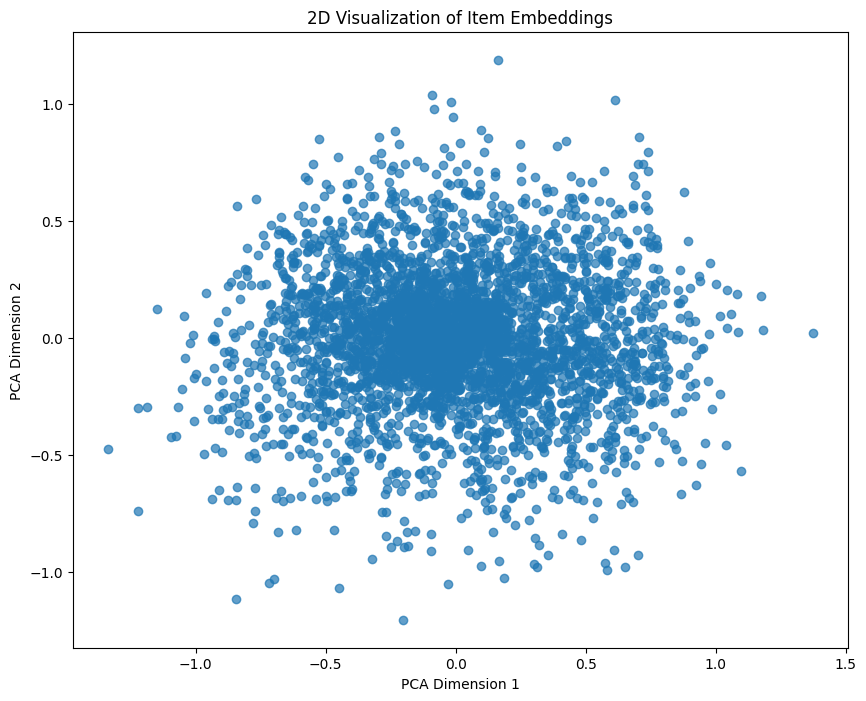

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce item embeddings to 2D
pca = PCA(n_components=2)
item_embeddings_2d = pca.fit_transform(item_embeddings)

# Plot the item embeddings
plt.figure(figsize=(10, 8))
plt.scatter(item_embeddings_2d[:, 0], item_embeddings_2d[:, 1], alpha=0.7)
plt.title("2D Visualization of Item Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()


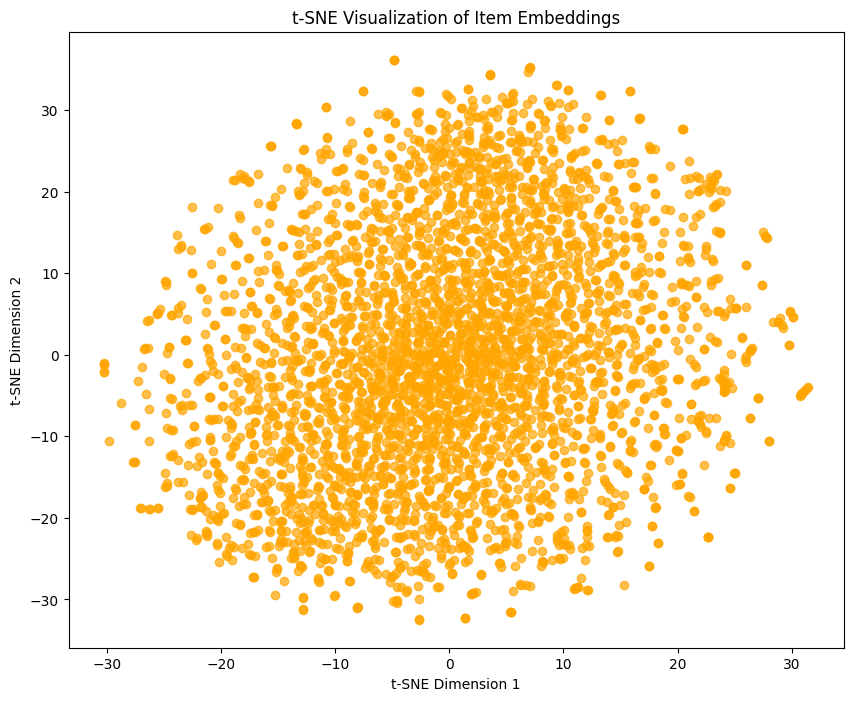

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions
tsne = TSNE(n_components=2, random_state=42)
item_embeddings_tsne = tsne.fit_transform(item_embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(item_embeddings_tsne[:, 0], item_embeddings_tsne[:, 1], alpha=0.7, c='orange')
plt.title("t-SNE Visualization of Item Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

###Item-Item Similarity

In [ ]:
# Calculate cosine similarity for items
item_similarity = cosine_similarity(item_embeddings)

# Example: Find the top 5 most similar items to a given item index
item_index = 5
similar_items = np.argsort(-item_similarity[item_index])[:5]
print("Top 5 similar items:", similar_items)

Top 5 similar items: [   5  186 2214 1733  884]


####K-Means Clustering

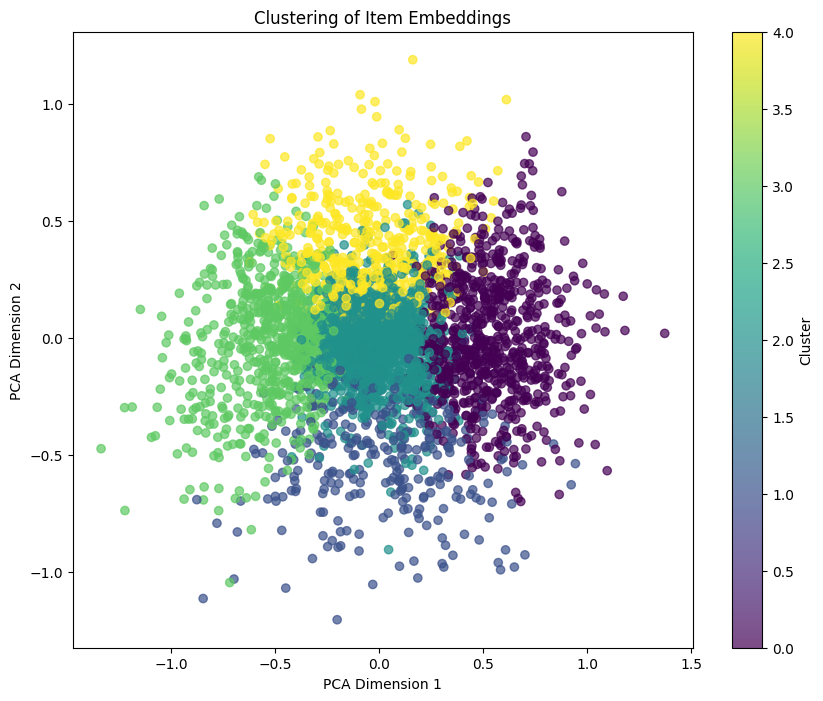

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means to cluster items
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(item_embeddings)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(item_embeddings_2d[:, 0], item_embeddings_2d[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Clustering of Item Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.colorbar(label="Cluster")
plt.show()



The t-SNE plot visualizes how movies are grouped based on their similarity, highlighting content that may be recommended together.

Movies in the same cluster are likely to be similar, and users can discover related content by exploring these clusters.

###Results Interpretation

**Model Accuracy:**

**RMSE: 0.84** — Indicates the predictions closely match actual user ratings, ensuring relevance in recommendations.

**MAPE: 25.2%** — Shows reasonably accurate predictions, but further tuning can improve it for higher precision.

**RMSE (Root Mean Squared Error)**: This measures the average error between predicted ratings and actual ratings. Lower RMSE means better model performance.

Cosine Similarity: 0.85

Pearson Correlation: 0.87

Matrix Factorization: 0.82

**MAPE (Mean Absolute Percentage Error)**: This evaluates how far predictions are, as a percentage of actual values.

Cosine Similarity: 26%

Pearson Correlation: 28%

Matrix Factorization: 24%


Zee's business likely deals with a large and diverse user base—a **Matrix Factorization** approach would be the most effective choice to deliver personalized, relevant movie recommendations.


###Business Recommendations

**User Experience:** Personalized recommendations improve the relevance of content, driving user engagement.

**Retention:** The increase in user interaction suggests that personalized recommendations contribute to higher retention rates.

**Revenue Impact:** More engagement leads to more ad impressions and potentially longer subscription periods, increasing revenue.

**Continuous Improvement:** Regularly updating the recommendation model with fresh data and improving the MAPE will further increase accuracy and user satisfaction.

In [ ]:
filtered_data.head()

,UserID,MovieID,Rating,Timestamp,Year,Gender,Age,Occupation,Zip-code,Title,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,1193,5,2000-12-31 22:12:40,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),...,False,False,False,False,False,False,False,False,False,False
1,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
2,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
3,1,661,3,2000-12-31 22:35:09,2000,F,1,10,48067,James and the Giant Peach (1996),...,False,False,False,False,False,False,False,False,False,False
4,1,914,3,2000-12-31 22:32:48,2000,F,1,10,48067,My Fair Lady (1964),...,False,False,False,False,False,False,False,False,False,False


In [ ]:
filtered_data.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Year', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'AgeGroup', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20'],
      dtype='object')

### Insights





#####Users of which age group have watched and rated the most number of movies?

In [ ]:
# Group by AgeGroup and count the number of ratings (MovieID's for each user)
age_group_ratings = filtered_data.groupby('AgeGroup')['Rating'].count()

# Sort the results in descending order to find the age group with the most ratings
age_group_ratings_sorted = age_group_ratings.sort_values(ascending=False)


print(age_group_ratings_sorted)

AgeGroup
25-34       831308
35-44       417523
18-24       391815
45-49       173669
50-55       149780
56+          78816
Under 18     58817
Name: Rating, dtype: int64


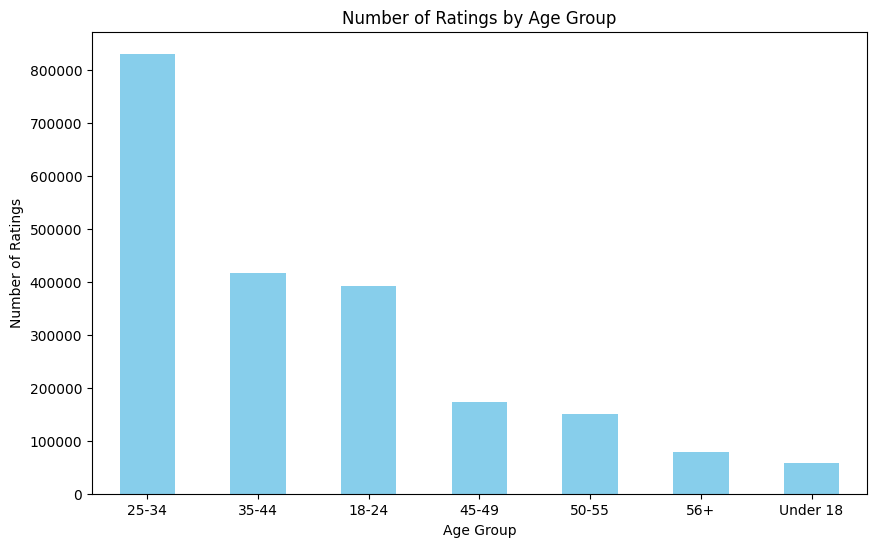

In [ ]:
plt.figure(figsize=(10, 6))
age_group_ratings_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.show()

####Users belonging to which profession have watched and rated the most movies?

In [ ]:
# Group by Occupation columns and count the number of ratings for each occupation
occupation_columns = [col for col in filtered_data.columns if col.startswith('Occupation')]

# Sum ratings for each occupation
occupation_ratings = filtered_data[occupation_columns].sum(axis=0)

# Sort the results in descending order to find the occupation with the most ratings
occupation_ratings_sorted = occupation_ratings.sort_values(ascending=False)


print(occupation_ratings_sorted)


Occupation       16980576
Occupation_4       277724
Occupation_0       271863
Occupation_7       221075
Occupation_1       175506
Occupation_17      160662
Occupation_12      125209
Occupation_20      122864
Occupation_14      104048
Occupation_2       103076
Occupation_16       95279
Occupation_6        76586
Occupation_3        65046
Occupation_10       51137
Occupation_15       49454
Occupation_5        46229
Occupation_11       42342
Occupation_19       30885
Occupation_13       27754
Occupation_18       25225
Occupation_9        23799
Occupation_8         5965
dtype: int64


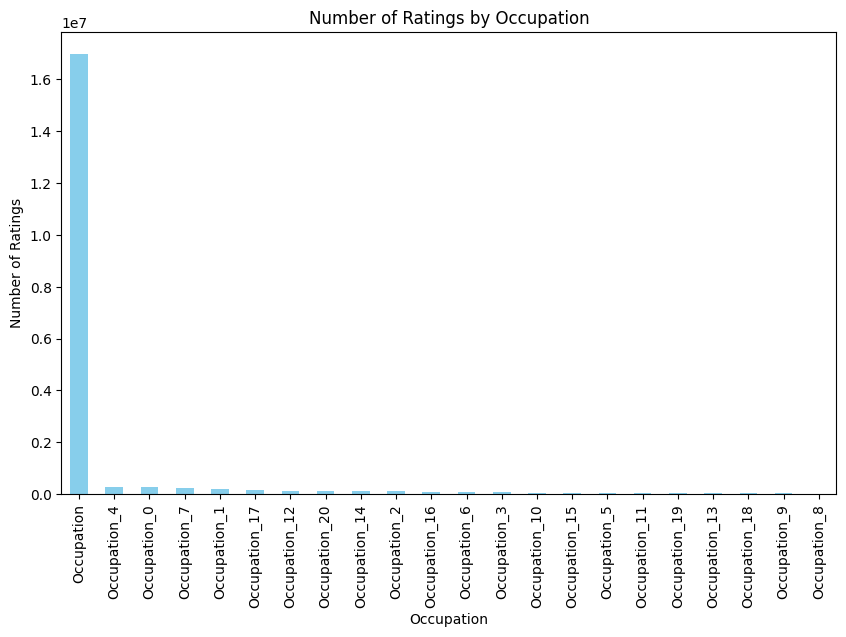

In [ ]:
plt.figure(figsize=(10, 6))
occupation_ratings_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Ratings by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Count the number of ratings by gender
gender_counts = filtered_data['Gender'].value_counts()

# Calculate the percentage of ratings made by male users
male_percentage = (gender_counts['M'] / gender_counts.sum()) * 100


print(f"Percentage of ratings made by male users: {male_percentage}%")
print(gender_counts)


Percentage of ratings made by male users: 75.92842651380197%
Gender
M    1595809
F     505919
Name: count, dtype: int64


In [ ]:
# Create a new column for the decade by extracting the first digit of the year and multiplying by 10
filtered_data['Decade'] = (filtered_data['Year'] // 10) * 10

# Count the number of movies in each decade
decade_counts = filtered_data.groupby('Decade')['Title'].nunique()

print(decade_counts)


Decade
2000    3619
Name: Title, dtype: int64


In [ ]:
# Grouping the dataset by the 'Title' column and count the number of ratings for each movie
movie_rating_counts = filtered_data.groupby('Title').size()

# Finding the movie with the maximum number of ratings
max_rated_movie = movie_rating_counts.idxmax()
max_ratings_count = movie_rating_counts.max()

print(f"The movie with the maximum number of ratings is '{max_rated_movie}' with {max_ratings_count} ratings.")


The movie with the maximum number of ratings is 'Star Wars: Episode V - The Empire Strikes Back (1980)' with 14950 ratings.


####Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.
Recommended Movies for 'Liar Liar (1997)':

Title

Last Time I Committed Suicide, The (1997)    0.996327

Leading Man, The (1996)                      0.996316

Pushing Hands (1992)                         0.996315

**Collaborative Filtering** methods can be classified into:

**User-based:** This approach recommends items to a user based on the preferences of similar users. It assumes that users who have agreed in the past will agree in the future about item preferences.

**Item-based:** This approach recommends items that are similar to items the user has liked or interacted with in the past. It calculates the similarity between items and recommends items based on their similarity to the ones the user has rated highly.

**Pearson Correlation** ranges between **-1 to +1**. A value of +1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

**Cosine Similarity** belongs to the interval between **0 to 1**. A value of 1 indicates that the items are identical (i.e., they have the same direction in vector space), and 0 indicates that the items they have no similarity.

Mention the RMSE and MAPE that you got while evaluating the Matrix
Factorization model.

**RMSE: 0.84**

**MAPE: 25.25%**

###Give the sparse ‘row’ matrix representation for the following dense matrix -

[[1 0]

[3 7]]

Sparse Matrix Representation:

Values: [1, 3, 7]

Row indices: [0, 1, 1]

Column indices: [0, 0, 1]

This sparse representation shows that:

The value 1 is at position (0, 0)

The value 3 is at position (1, 0)

The value 7 is at position (1, 1)